Initial exploratory analyses of demographic data

In [169]:
import pandas,numpy
import seaborn as sns
import matplotlib.pyplot as plt

from metadata_utils import load_metadata

%matplotlib inline

%load_ext rpy2.ipython
from IPython.display import display, HTML
pandas.set_option('max_colwidth', 100)




The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [170]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [171]:
demog_all=pandas.read_csv('surveydata/demographics.tsv',delimiter='\t')
demog=demog_all.copy()
demog_metadata=load_metadata('demographics')
del demog['RelationshipStatus']
del demog['RentOwn']
demog['WeightPounds'][demog['WeightPounds']<80]=numpy.nan
demog['BMI']=demog['WeightPounds']*0.45 / (demog['HeightInches']*0.025)**2
demog.describe().T

/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Sex,163.0,0.490798,0.501456,0.000000,0.0,0.0,1.0,1.000000
Age,163.0,33.766871,8.381763,20.000000,27.0,32.0,39.5,59.000000
HispanicLatino,163.0,0.073620,0.261956,0.000000,0.0,0.0,0.0,1.000000
HighestEducation,163.0,3.460123,0.876619,1.000000,3.0,3.0,4.0,6.000000
HeightInches,163.0,67.552147,4.567942,50.000000,64.0,67.0,71.0,79.000000
WeightPounds,162.0,181.771605,52.510901,98.000000,NaN,NaN,NaN,362.000000
DivorceCount,163.0,0.147239,0.433663,0.000000,0.0,0.0,0.0,2.000000
LongestRelationship,163.0,81.030675,80.335594,0.000000,22.0,50.0,120.0,360.000000
RelationshipNumber,163.0,3.288344,1.665644,0.000000,2.0,3.0,5.0,6.000000
ChildrenNumber,163.0,0.791411,1.204180,0.000000,0.0,0.0,1.0,5.000000


In [172]:
print('Proportion with current gambling problem: %f'%numpy.mean(demog.GamblingProblem>1))
print('Proportion ever divorced: %f'%numpy.mean(demog.DivorceCount>1))

print('Proportion with at least one traffic ticket in last year: %f'%numpy.mean(demog.TrafficTicketsLastYearCount>0))


print('Proportion arrested more than once: %f'%numpy.mean(demog.ArrestedChargedLifeCount>0))
print('Proportion arrested more than twice: %f'%numpy.mean(demog.ArrestedChargedLifeCount>1))
print('Proportion with >$10,000 credit card debt: %f'%numpy.mean(demog.CreditCardDebt>3))




Proportion with current gambling problem: 0.024540
Proportion ever divorced: 0.030675
Proportion with at least one traffic ticket in last year: 0.073620
Proportion arrested more than once: 0.177914
Proportion arrested more than twice: 0.098160
Proportion with >$10,000 credit card debt: 0.079755


0.33 percent subjects with BMI>30 (obese)
0.08 percent subjects with BMI>40 (extreme obesity)


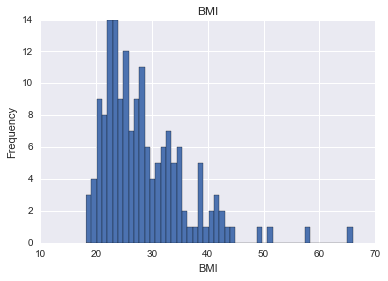

In [173]:
demog.BMI.hist(bins=50)
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
print('%0.2f percent subjects with BMI>30 (obese)'%numpy.mean(demog.BMI>30))
print('%0.2f percent subjects with BMI>40 (extreme obesity)'%numpy.mean(demog.BMI>40))

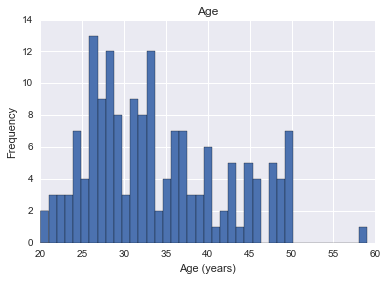

In [174]:
demog.Age.hist(bins=40)
plt.title('Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

In [175]:
demog.corr()



,Sex,Age,HispanicLatino,HighestEducation,HeightInches,WeightPounds,DivorceCount,LongestRelationship,RelationshipNumber,ChildrenNumber,...,CoffeeCupsPerDay,TeaCupsPerDay,CaffienatedSodaCansPerDay,CaffieneOtherSourcesDayMG,GamblingProblem,TrafficTicketsLastYearCount,TrafficAccidentsLifeCount,ArrestedChargedLifeCount,OtherDebtAmount,BMI
Sex,1.000000,0.108166,-0.135787,-0.039457,-0.606800,-0.258904,0.119812,0.177677,-0.007889,0.252366,...,0.053558,0.078625,0.034408,0.087164,-0.188672,-0.049281,0.067257,-0.187066,0.016548,0.022630
Age,0.108166,1.000000,-0.009003,0.032332,-0.013223,0.056560,0.391604,0.575717,0.453182,0.334583,...,0.237911,0.053223,0.047632,-0.112283,0.090276,-0.067190,0.358523,0.129903,0.018501,0.079112
HispanicLatino,-0.135787,-0.009003,1.000000,0.039744,0.053517,0.031851,-0.041670,-0.086346,0.007638,-0.127138,...,-0.028978,0.045759,0.010747,-0.099537,0.002883,-0.016722,-0.031489,-0.028912,0.081244,-0.001536
HighestEducation,-0.039457,0.032332,0.039744,1.000000,0.121148,-0.136707,0.031778,-0.124055,0.103044,-0.177511,...,-0.009341,0.094498,-0.154851,-0.063447,-0.059809,-0.142648,-0.081058,-0.142526,-0.018250,-0.244657
HeightInches,-0.606800,-0.013223,0.053517,0.121148,1.000000,0.466057,-0.019480,-0.123682,0.161489,-0.121453,...,-0.053025,-0.033497,-0.086387,-0.046602,0.064757,-0.008667,-0.017059,0.031026,0.060198,-0.038962
WeightPounds,-0.258904,0.056560,0.031851,-0.136707,0.466057,1.000000,0.008835,-0.025931,-0.065752,0.003661,...,-0.079364,0.034833,0.161828,-0.082618,0.082973,0.166562,0.114112,0.031535,0.079330,0.857685
DivorceCount,0.119812,0.391604,-0.041670,0.031778,-0.019480,0.008835,1.000000,0.254660,0.231417,0.319230,...,0.254655,0.079636,0.044414,-0.041476,-0.037066,0.010863,0.215917,0.031660,0.230935,0.016615
LongestRelationship,0.177677,0.575717,-0.086346,-0.124055,-0.123682,-0.025931,0.254660,1.000000,0.181137,0.557124,...,0.214733,-0.033736,0.055915,0.000109,-0.119818,-0.095175,0.147249,-0.041938,0.051896,0.039350
RelationshipNumber,-0.007889,0.453182,0.007638,0.103044,0.161489,-0.065752,0.231417,0.181137,1.000000,0.147120,...,0.220025,0.081554,-0.069984,0.083842,0.055441,-0.139035,0.341739,0.139306,0.089019,-0.164592
ChildrenNumber,0.252366,0.334583,-0.127138,-0.177511,-0.121453,0.003661,0.319230,0.557124,0.147120,1.000000,...,0.243880,0.008340,0.073239,-0.003932,-0.121033,0.019630,0.155961,-0.033139,0.045255,0.067420


### Health status

For the psychological state variables, I binarize them so that the mean expresses the proportion of subjects reporting any level of these symptoms.

In [176]:
health_metadata=load_metadata('health')
healthdata=pandas.read_csv('surveydata/health.tsv',delimiter='\t',index_col=0)
symptoms=['Nervous','Hopeless','RestlessFidgety','Depressed','EverythingIsEffort','Worthless']
for s in symptoms:
    healthdata[s]=(healthdata[s]>0).astype('int')

d=healthdata.describe().T
itemtext=[health_metadata[i]['Description'] for i in d.index]

d['Itemtext']=itemtext
display(d)

/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,Itemtext
Nervous,163.0,0.705521,0.457213,0.0,0.0,1.0,1.0,1.0,... nervous?
Hopeless,163.0,0.466258,0.500397,0.0,0.0,0.0,1.0,1.0,... hopeless?
RestlessFidgety,163.0,0.711656,0.454388,0.0,0.0,1.0,1.0,1.0,... restless or fidgety?
Depressed,163.0,0.404908,0.492387,0.0,0.0,0.0,1.0,1.0,... so depressed that nothing could cheer you up?
EverythingIsEffort,163.0,0.638037,0.482049,0.0,0.0,1.0,1.0,1.0,... that everything was an effort?
Worthless,163.0,0.404908,0.492387,0.0,0.0,0.0,1.0,1.0,... worthless?
Last30DaysUsual,163.0,3.883436,0.977479,1.0,4.0,4.0,4.0,7.0,Q2: The last six questions asked about feelings that might have occurred during the past 30\nday...
DaysLostLastMonth,125.0,1.520000,3.397342,0.0,NaN,NaN,NaN,16.0,"Q3: During the past 30 days, how many days out of 30 were you totally unable to work or\ncarry o..."
DaysHalfLastMonth,130.0,2.023077,3.932503,0.0,NaN,NaN,NaN,30.0,"Q4: Not counting the days you reported in response to Q3, how many days in the past\n30 were you..."
DoctorVisitsLastMonth,138.0,0.340580,2.618007,0.0,NaN,NaN,NaN,30.0,"Q5: During the past 30 days, how many times did you see a doctor or other health\nprofessional a..."


In [177]:
disorders=healthdata['PsychDiagnoses'].unique()
ddata=[]
for d in disorders:
    diag=healthdata.query('PsychDiagnoses=="%s"'%d)
    ddata.append([d.lstrip(),diag.shape[0]/healthdata.shape[0]])
df=pandas.DataFrame(ddata,columns=['Diagnosis','Frequency(Percent)'])
display(df)

,Diagnosis,Frequency(Percent)
0,Depression,0.147239
1,None,0.717791
2,ADHD,0.030675
3,Obessive Compulsive Disorder,0.006135
4,Anxiety Disorder,0.073620
5,Alcohol Dependency,0.006135
6,Anorexi Nervosa,0.012270
7,Drug Dependency,0.006135


### Alcohol/Drug use

In [178]:
drug_metadata=load_metadata('alcohol_drugs')
drugdata=pandas.read_csv('surveydata/alcohol_drugs.tsv',delimiter='\t',index_col=0)
d=drugdata.describe().T
itemtext=[drug_metadata[i]['Description'] for i in d.index]

d['Itemtext']=itemtext
display(d)

/Users/poldrack/anaconda/envs/py34/lib/python3.4/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,Itemtext
LifetimeSmoke100Cigs,163.0,0.460123,0.499943,0.0,0.0,0.0,1.0,1.0,"Altogether, have you smoked at least 100 or more cigarettes in your entire lifetime?"
HowLongSmoked,163.0,2.668712,3.127053,0.0,0.0,0.0,6.0,7.0,How long have you smoked (cumulatively)?
SmokeEveryDay,163.0,0.760736,1.200999,0.0,0.0,0.0,1.0,3.0,"Do you now smoke cigarettes every day, some days or not at all?"
CigsPerDay,163.0,0.957055,1.778992,0.0,0.0,0.0,1.0,7.0,"On average, how many cigarettes do you now smoke a day (1 pack = 20 cigarettes)?"
HowSoonSmokeAfterWaking,163.0,0.662577,1.315721,0.0,0.0,0.0,1.0,5.0,How soon after you wake up do you smoke your first cigarette?
AlcoholHowOften,163.0,1.588957,1.284908,0.0,1.0,1.0,3.0,4.0,How often do you have a drink containing alcohol?
AlcoholHowManyDrinksDay,163.0,1.527607,0.918351,1.0,1.0,1.0,2.0,5.0,How many drinks containing alcohol do you have on a typical day when you are drinking?
AlcoholHowOften6Drinks,163.0,0.662577,0.995179,0.0,0.0,0.0,1.0,4.0,How often do you have six or more drinks on one occasion?
HowOftenCantStopDrinking,163.0,0.226994,0.739541,0.0,0.0,0.0,0.0,4.0,How often during the last year have you found that you were not able to stop drinking once you h...
HowOftenFailedActivitiesDrinking,163.0,0.196319,0.627152,0.0,0.0,0.0,0.0,4.0,How often during the last year have you failed to do what was normally expected from you because...


In [186]:
print('Proportion of current smokers: %f'%numpy.mean(drugdata.SmokeEveryDay>0))
print('Proportion of cannabis users: %f'%numpy.mean(drugdata.CannabisHowOften>0))
print('Proportion of daily cannabis users: %f'%numpy.mean(drugdata.CannabisHowOften>3))
q=drugdata.query('AlcoholHowOften>3 & AlcoholHowManyDrinksDay>1')
print('Proportion of heavy drinkers (4+ times per week, 3+ drinks per time): %f'%float(q.shape[0]/drugdata.shape[0]))
print('Proportion reporting trouble stopping their drinking: %f'%numpy.mean(drugdata.HowOftenCantStopDrinking>3))







Proportion of current smokers: 0.325153
Proportion of cannabis users: 0.257669
Proportion of daily cannabis users: 0.122699
Proportion of heavy drinkers (4+ times per week, 3+ drinks per time): 0.055215
Proportion reporting trouble stopping their drinking: 0.018405


In [201]:
print('Cigarettes smoked per day')
cigdata=[]
for i in drug_metadata['CigsPerDay']['Levels']:
    q=drugdata.query('CigsPerDay == %d'%float(i))
    cigdata.append([int(i),drug_metadata['CigsPerDay']['Levels'][i],q.shape[0]])
df=pandas.DataFrame(cigdata,columns=['Resp','Frequency','Proportion'])
df=df.sort_values(by='Resp')
display(df)

Cigarettes smoked per day


,Resp,Frequency,Proportion
4,0,I don't smoke,119
3,1,Less than a cigarette a day,7
5,2,<5,5
0,3,5-10,7
1,4,10-20,11
6,5,1 pack,11
7,6,2 packs,2
2,7,More than 2 packs,1
